In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [9]:
img_path_1 = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training/436219-7159-48057-[1, 0, 0].png'
img_path_2 = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training/436219-41863-40617-[0, 0, 1].png'

In [213]:
img_path_1[:-13]

'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training/436219-7159-48057-'

In [10]:
im1 = cv2.imread(img_path_1)
im2 = cv2.imread(img_path_2)

Text(0.5, 1.0, '[0, 0, 1]')

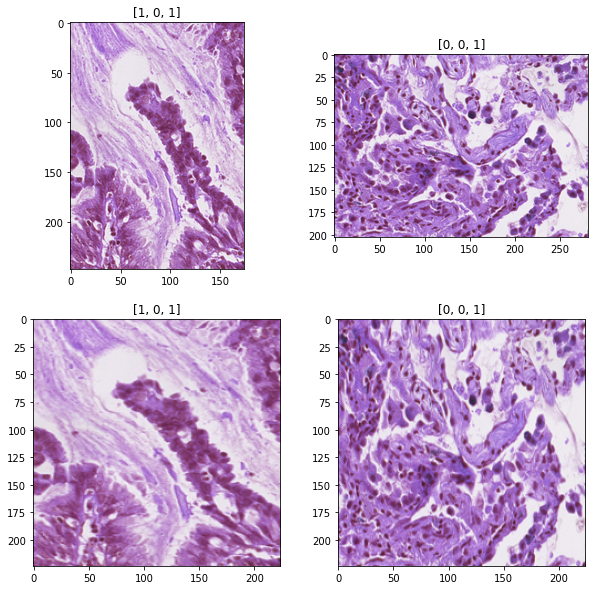

In [14]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(2,2,1)
ax.imshow(im1)
ax.set_title('[1, 0, 1]')

ax = fig.add_subplot(2,2,2)
ax.imshow(im2)
ax.set_title('[0, 0, 1]')

ax = fig.add_subplot(2,2,3)
ax.imshow(cv2.resize(im1, (224,224)))
ax.set_title('[1, 0, 1]')

ax = fig.add_subplot(2,2,4)
ax.imshow(cv2.resize(im2, (224,224)))
ax.set_title('[0, 0, 1]')

In [15]:
def rand_bbox(size, lamb):
    """ Generate random bounding box 
    Args:
        - size: [width, breadth] of the bounding box
        - lamb: (lambda) cut ratio parameter, sampled from Beta distribution
    Returns:
        - Bounding box
    """
    W = size[0]
    H = size[1]
    cut_rat = np.sqrt(1. - lamb)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

In [58]:
lamb = 0.65

In [23]:
def generate_cutmix_image(source, dest, image_1, image_2, beta = 1.0):
    """ Generate a CutMix augmented image from a batch 
    Args:
        - image_batch: a batch of input images
        - image_batch_labels: labels corresponding to the image batch
        - beta: a parameter of Beta distribution.
    Returns:
        - CutMix image batch, updated labels
    """
    # generate mixed sample
    image_path_1 = source + '/' + image_1
    image_path_2 = source + '/' + image_2
    lam = np.random.beta(beta, beta)
    img_1 = cv2.resize(cv2.imread(image_path_1), (224,224))
    img_2 = cv2.resize(cv2.imread(image_path_2), (224,224))
    bbx1, bby1, bbx2, bby2 = rand_bbox(img_1.shape, lam)
    img_upd_1 = img_1.copy()
    img_upd_1[bbx1:bbx2, bby1:bby2] = img_2[bbx1:bbx2, bby1:bby2]

    label_1 = list(map(int, image_1[-13:-4].strip('][').split(', ')))
    label_2 = list(map(int, image_2[-13:-4].strip('][').split(', ')))

    label = list(map(sum, zip(label_1, label_2)))
    
    return img_upd_1, label

In [26]:
cutmix_img, label = generate_cutmix_image(source = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training',
                                            dest = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training',
                                            image_1 = '436219-7159-48057-[1, 0, 0].png',
                                            image_2 = '436219-41863-40617-[0, 0, 1].png')

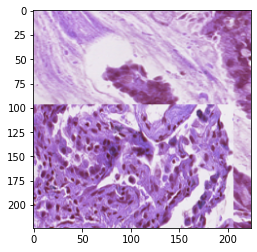

In [28]:
plt.imshow(cutmix_img)

In [22]:
a = [1, 0, 0]
b = [0, 0, 1]
list(map(sum, zip(a, b)))

[1, 0, 1]

In [29]:
np.random.seed(42)

In [55]:
np.random.randint(0, 2, size=2)

array([0, 0])

In [144]:
def generate_cutmix_image(source, dest, images, lamb = 1.0):
    """ Generate a CutMix augmented image from a batch 
    Args:
        - image_batch: a batch of input images
        - image_batch_labels: labels corresponding to the image batch
        - beta: a parameter of Beta distribution.
    Returns:
        - CutMix image batch, updated labels
    """
    # generate mixed sample
    
    np.random.shuffle(np.array(images))
    base = cv2.resize(cv2.imread(source + '/' + images[0]), (224,224))
    label = list(map(int, images[0][-13:-4].strip('][').split(', ')))

    for i in images[1:]:
        
        lam = np.random.beta(lamb, lamb)
        #lam = beta
        img = cv2.resize(cv2.imread(source + '/' + i), (224,224))
        
        bbx1, bby1, bbx2, bby2 = rand_bbox(base.shape, lam)
        
        base[bbx1:bbx2, bby1:bby2] = img[bbx1:bbx2, bby1:bby2]

        #label_1 = list(map(int, images[i][-13:-4].strip('][').split(', ')))
        #label_2 = list(map(int, images[i][-13:-4].strip('][').split(', ')))

        label = list(map(sum, zip(label, list(map(int, i[-13:-4].strip('][').split(', '))))))
    
    return base, label

In [132]:
cutmix_img, label = generate_cutmix_image(source = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training',
                                            dest = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training',
                                            images = ['436219-7159-48057-[1, 0, 0].png', '436219-41863-40617-[0, 0, 1].png'],
                                            lamb= 0.35)

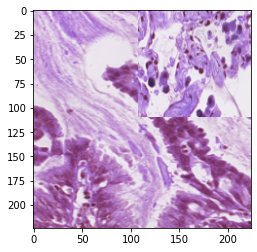

In [133]:
plt.imshow(cutmix_img)

In [86]:
label

[1, 0, 1]

In [169]:
cutmix_img, label = generate_cutmix_image(source = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training',
                                            dest = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training',
                                            images = ['436219-7159-48057-[1, 0, 0].png', '436219-41863-40617-[0, 0, 1].png', '444302-30121-47235-[0, 1, 0].png'],
                                            lamb = 1.0)

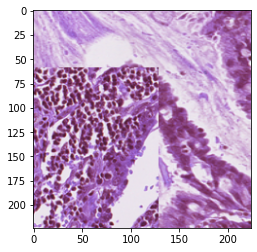

In [170]:
plt.imshow(cutmix_img)

In [91]:
label

[1, 1, 1]

In [57]:
arr = np.arange(0, 10)
print(arr)

np.random.shuffle(arr)
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[1 5 4 8 0 7 6 3 2 9]


In [92]:
source = 'C:/Users/hamma/Desktop/NCL/DS/11_FP_D/WSSS4LUAD-20220422T171928Z-001/WSSS4LUAD/1.training/1.training'

In [93]:
images = os.listdir(source)

In [125]:
tumor = [x for x in images if '[1, 0, 0]' in x]
stroma = [x for x in images if '[0, 1, 0]' in x]
normal = [x for x in images if '[0, 0, 1]' in x]

In [126]:
print(len(tumor))
print(len(stroma))
print(len(normal))

1181
1680
1832


In [127]:
tumor[0]

'1003370-24271-38413-[1, 0, 0].png'

In [128]:
np.random.shuffle(tumor)
np.random.shuffle(stroma)
np.random.shuffle(normal)

In [129]:
tumor[0]

'1224965-13665-46666-[1, 0, 0].png'

In [ ]:
def cutmix_augmentation(source, dest, image_lists):

    if len(image_lists) >2:
        

In [191]:
beta = 4
np.random.beta(beta, beta)

0.2433623243107892

In [ ]:
lamb = 0.4
W = 224
H = 224
cut_rat = np.sqrt(lamb)
cut_w = np.int(W * cut_rat)
cut_h = np.int(H * cut_rat)

# uniform
cx = np.random.randint(W)
cy = np.random.randint(H)

bbx1 = np.clip(cx - cut_w // 2, 0, W)
bby1 = np.clip(cy - cut_h // 2, 0, H)
bbx2 = np.clip(cx + cut_w // 2, 0, W)
bby2 = np.clip(cy + cut_h // 2, 0, H)

In [201]:
W = 224
H = 224
cut_rat = np.sqrt(0.45)
cut_w = np.int(W * cut_rat)
cut_h = np.int(H * cut_rat)

In [202]:
print(cut_w, cut_h)

150 150


In [203]:
cx = np.random.randint(224)
cy = np.random.randint(224)

print(cx, cy)

188 20


In [207]:
b1 = [0, 112, 0, 112]
b2 = [0, 112, 112, 224]
b3 = [112, 224, 0, 112]
b4 = [112, 224, 112, 224]
b5 = [56, 168, 56, 168]

In [208]:
boxes = [b1, b2, b3, b4, b5]